In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/home/vignesh/Downloads/land_price.csv')

In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data.size

118260

In [6]:
data.shape

(1460, 81)

In [7]:
pd.options.display.max_rows=100

In [8]:
data.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [17]:
missing_val = data.isna().sum()[data.isna().sum()>0]

In [16]:
missing_val

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [26]:
missingval40 =data.isna().sum()[data.isna().sum()>0]*100/data.shape[0]

In [27]:
missingval40

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [28]:
missingcol40 = data.isna().sum()[(data.isna().sum()*100/len(data))>40].index

In [29]:
missingcol40

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [30]:
data=data.drop(missingcol40,axis=1)

In [31]:
data.shape

(1460, 76)

In [36]:
missingobj=data[data.dtypes[data.dtypes=='object'].index].isna().sum()[data.isna().sum()>0].index

In [37]:
missingobj

Index(['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [42]:
for x in missingobj:
    data[x][data[x].isna()] = data[x].mode()[0]

<ipython-input-42-bc1a251ad99f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[x][data[x].isna()] = data[x].mode()[0]


In [44]:
data.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

In [45]:
missing_float = data[data.dtypes[data.dtypes=='float64'].index].isna().sum()[data.isna().sum()>0].index

In [46]:
missing_float

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [47]:
for x in missing_float:
    data[x][data[x].isna()] = data[x].mean()

<ipython-input-47-246e9cd7151c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[x][data[x].isna()] = data[x].mean()


In [48]:
data.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

### outlier value removal

In [64]:
numcols = data.dtypes[(data.dtypes=='int64') | (data.dtypes=='float64')].index

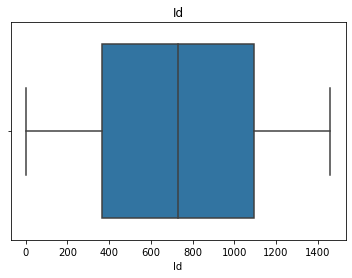

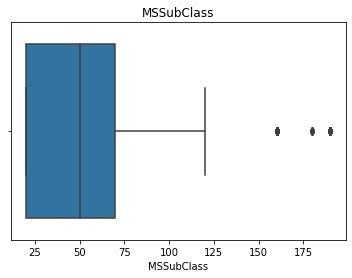

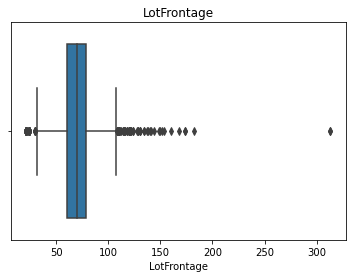

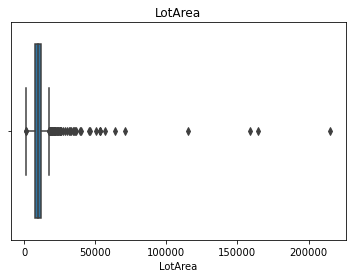

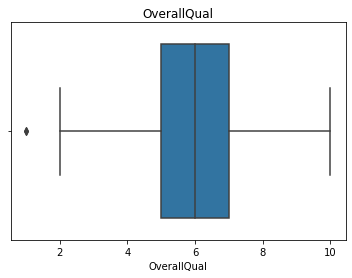

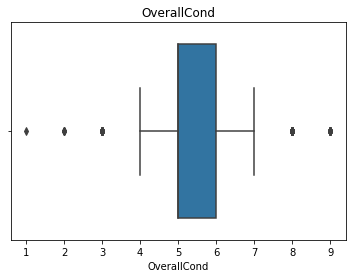

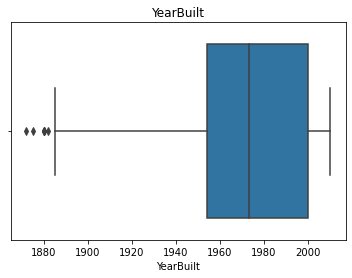

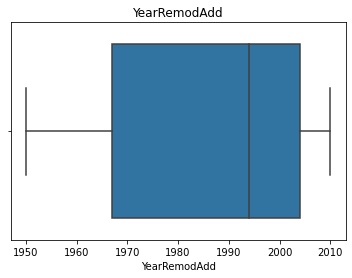

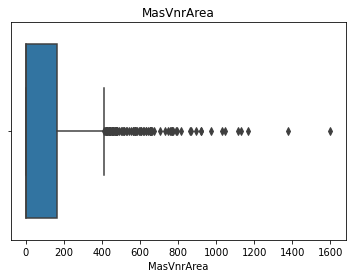

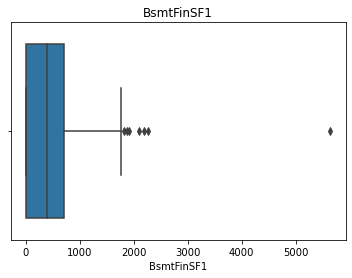

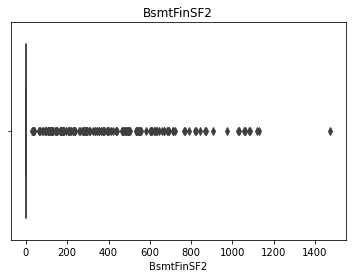

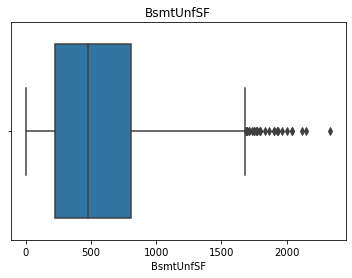

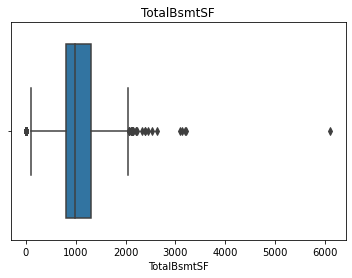

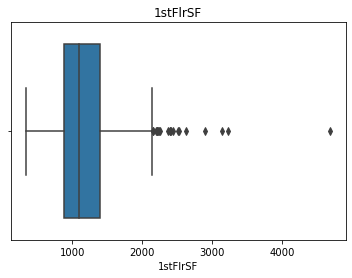

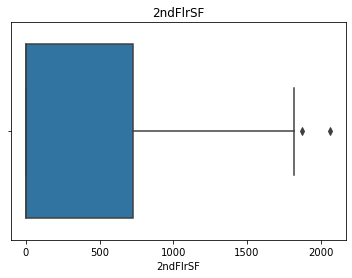

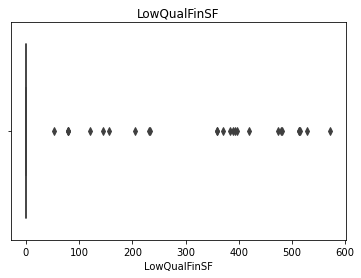

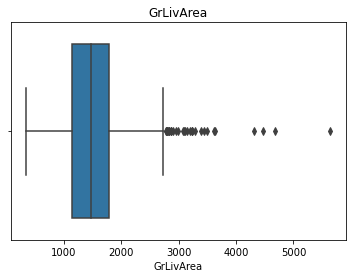

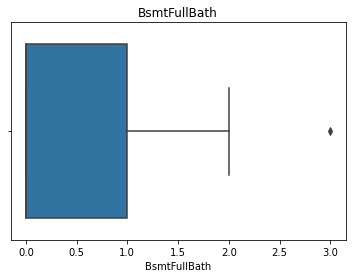

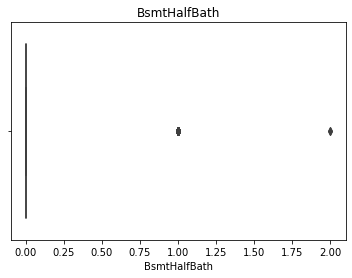

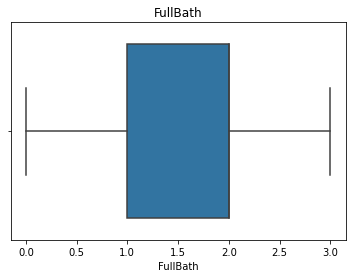

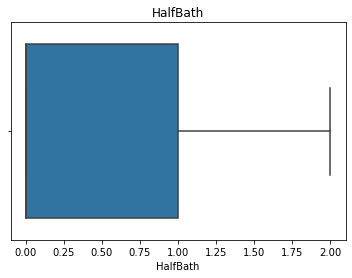

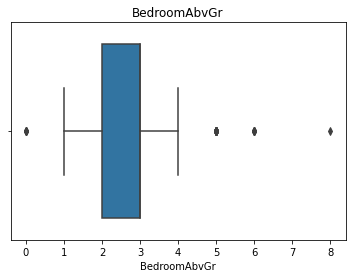

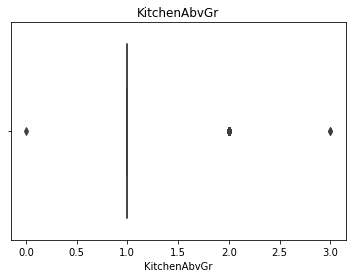

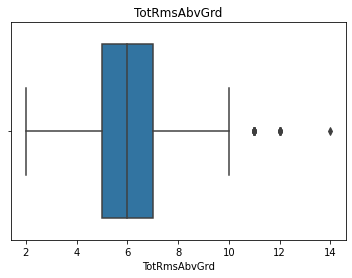

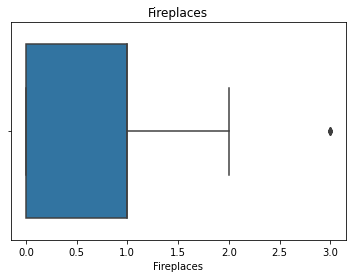

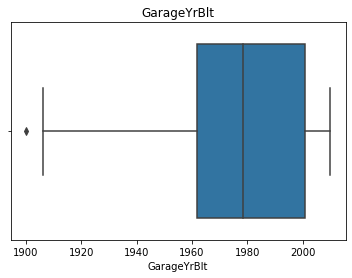

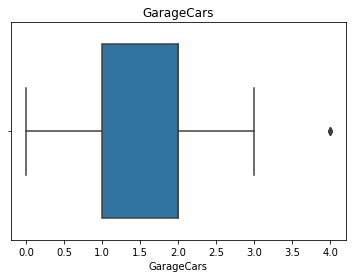

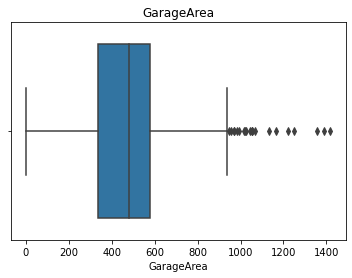

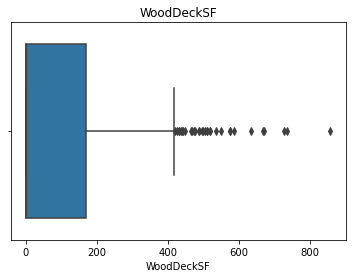

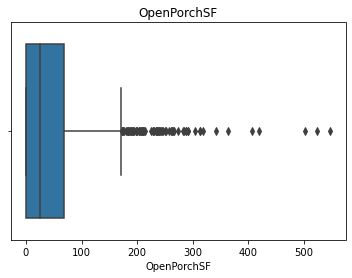

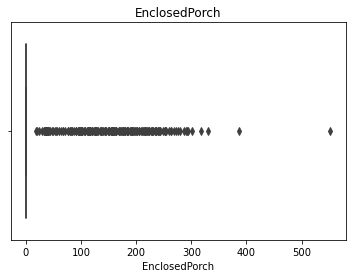

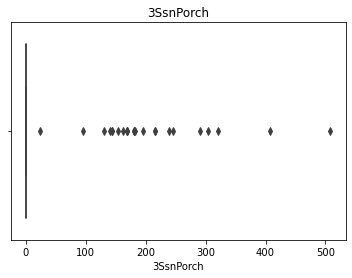

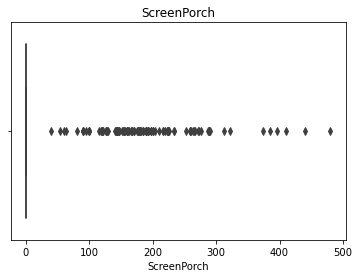

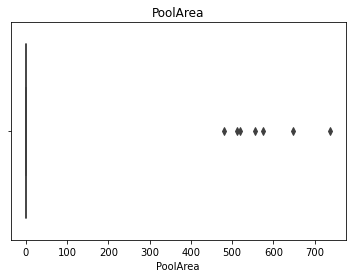

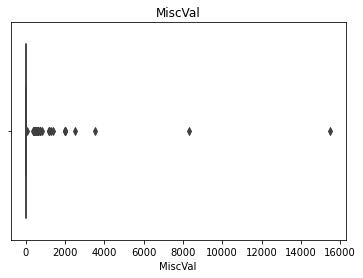

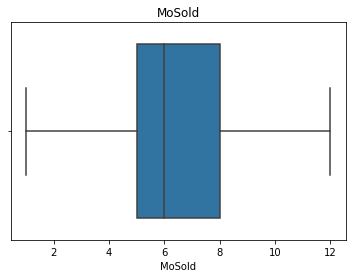

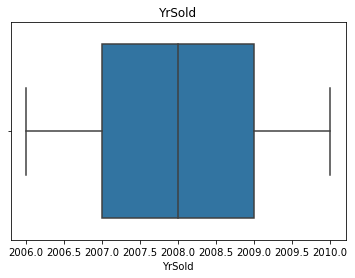

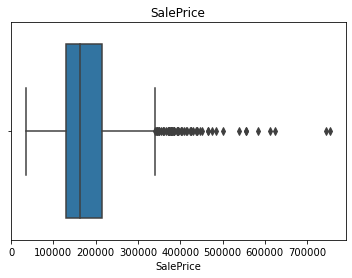

In [65]:
for x in numcols:
    sns.boxplot(data[x],orient='h')
    plt.title(x)
    plt.show()

In [67]:
sec = data.describe()
sec

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [71]:
for x in numcols:
    print(x)
    sec = data[x].describe()
    IQR = sec['75%']-sec['25%']
    upper_limit = sec['75%']+1.5*IQR
    lower_limit = sec['25%']-1.5*IQR
    data[x][data[x]>upper_limit] = upper_limit
    data[x][data[x]<lower_limit] = lower_limit
    
    


Id
MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SalePrice


<ipython-input-71-dd0d2c0e823e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[x][data[x]>upper_limit] = upper_limit
<ipython-input-71-dd0d2c0e823e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[x][data[x]<lower_limit] = lower_limit
<ipython-input-71-dd0d2c0e823e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[x][data[x]>upper_limit] = upper_limit
<ipython-input-71-dd0d2c0e823e>:8: SettingWithCopyWarning: 
A value

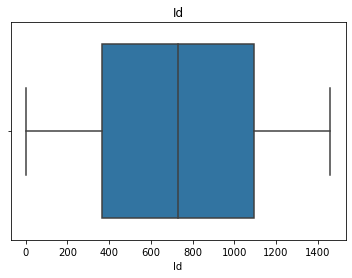

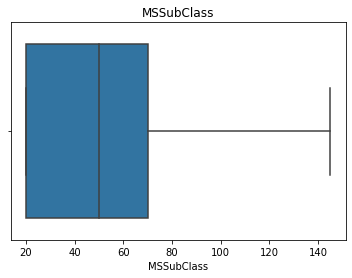

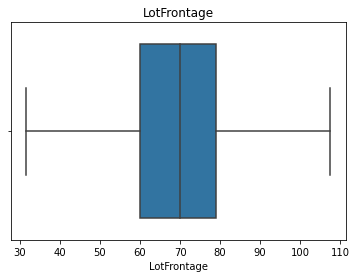

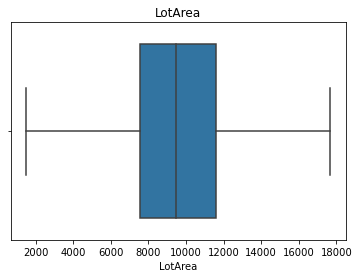

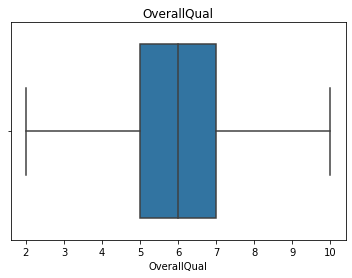

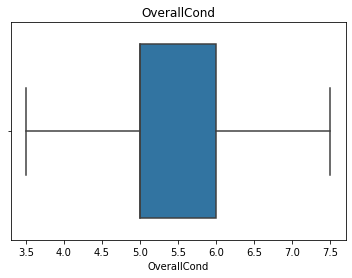

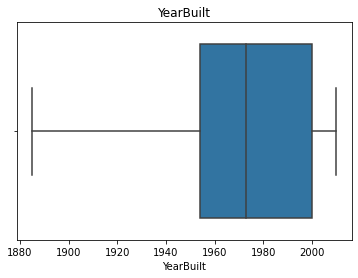

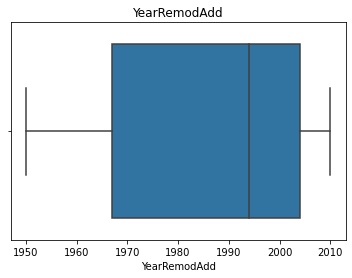

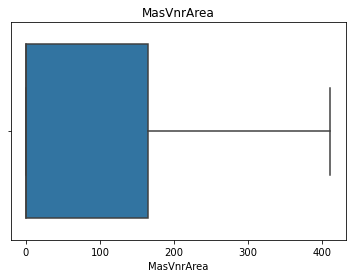

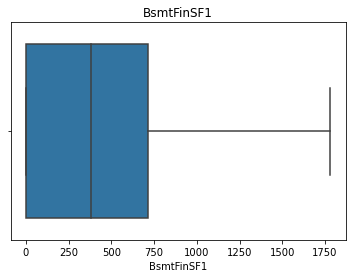

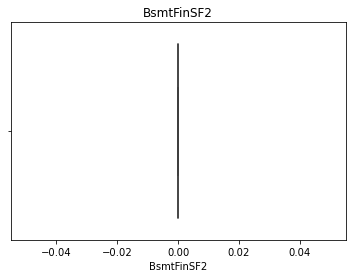

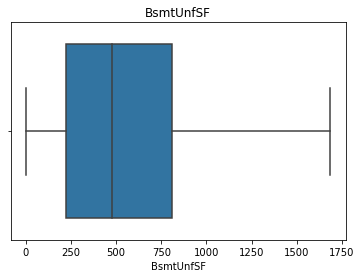

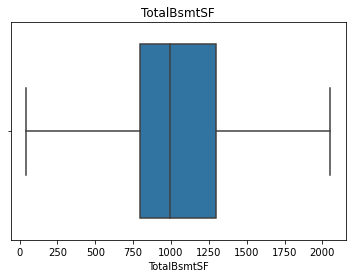

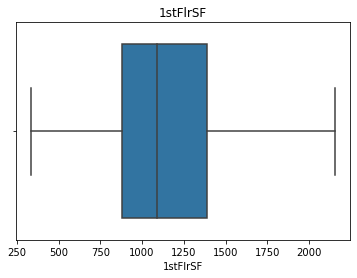

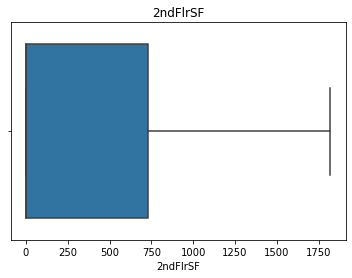

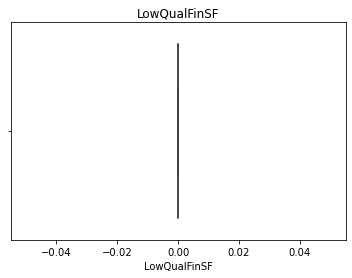

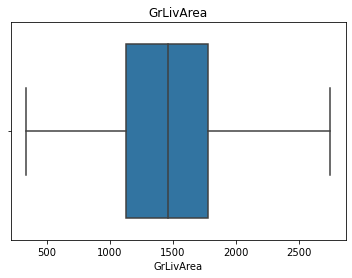

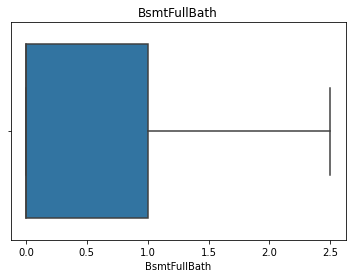

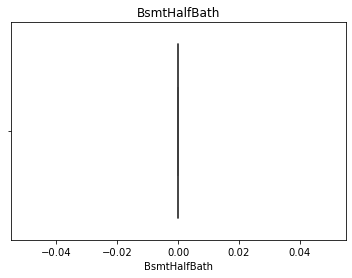

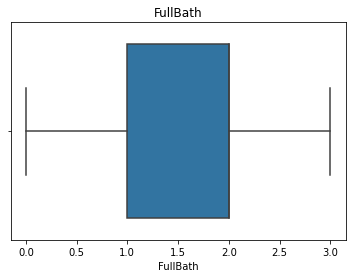

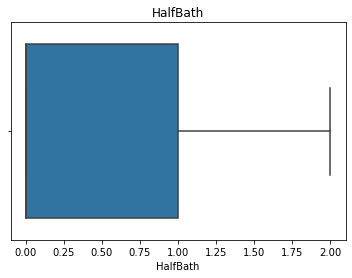

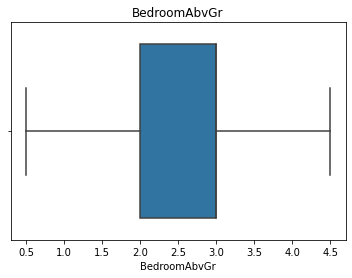

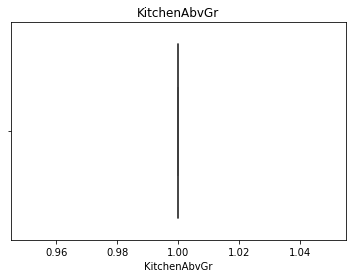

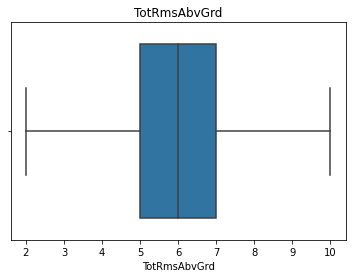

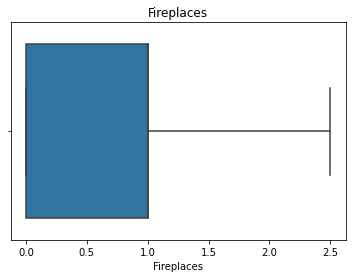

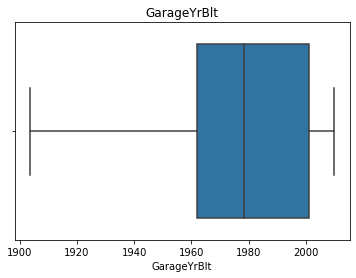

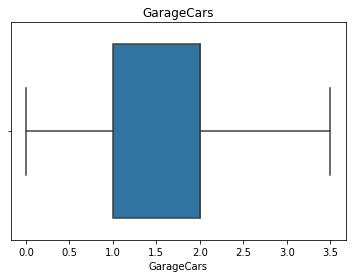

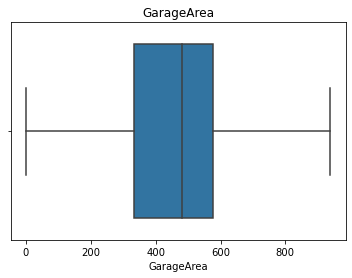

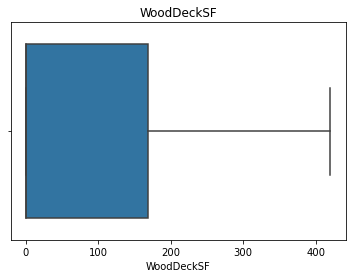

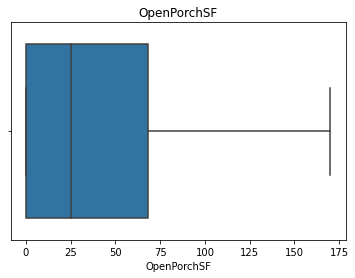

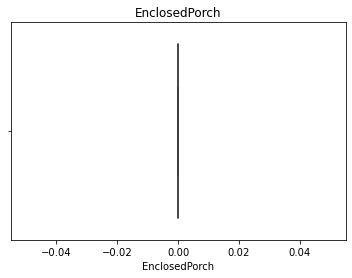

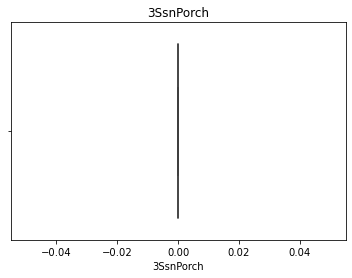

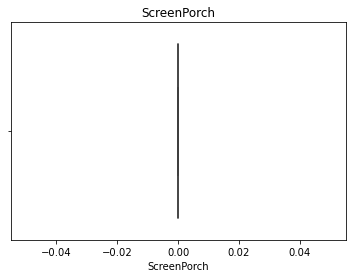

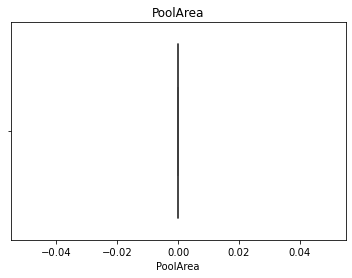

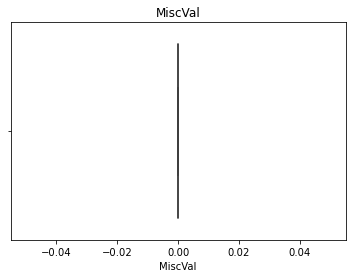

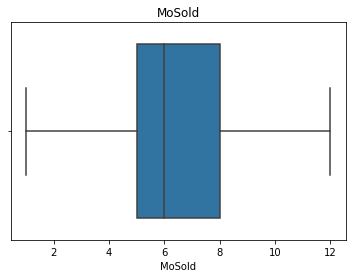

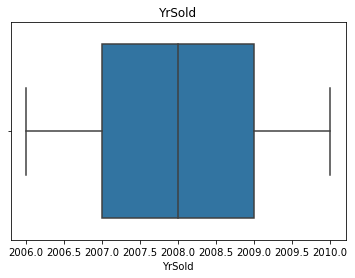

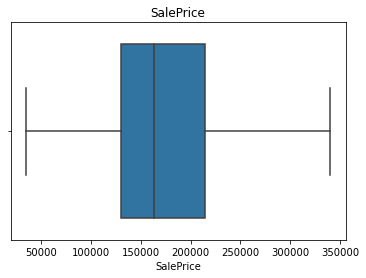

In [72]:
for x in numcols:
    sns.boxplot(data[x],orient='h')
    plt.title(x)
    plt.show()

# on_hot encoding

In [73]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000.0


In [77]:
data['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [78]:
pd.get_dummies(data['Street'])

,Grvl,Pave
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1455,0,1
1456,0,1
1457,0,1
1458,0,1


In [79]:
data.shape

(1460, 76)

In [80]:
data = pd.get_dummies(data)

In [81]:
data.shape

(1460, 272)

In [87]:
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450.0,7,5.0,2003,2003,196.0,706.0,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600.0,6,7.5,1976,1976,0.0,978.0,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250.0,7,5.0,2001,2002,162.0,486.0,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550.0,7,5.0,1915,1970,0.0,216.0,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260.0,8,5.0,2000,2000,350.0,655.0,0,...,0,0,0,1,0,0,0,0,1,0


In [85]:
data = data.drop('Id',axis=1)

##creating x y datasets

In [96]:
y = data['SalePrice']
x = data.drop('SalePrice',axis=1)

In [97]:
y.head()

0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

In [98]:
x.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450.0,7,5.0,2003,2003,196.0,706.0,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600.0,6,7.5,1976,1976,0.0,978.0,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250.0,7,5.0,2001,2002,162.0,486.0,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550.0,7,5.0,1915,1970,0.0,216.0,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260.0,8,5.0,2000,2000,350.0,655.0,0,...,0,0,0,1,0,0,0,0,1,0


In [99]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=.33)

In [100]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [102]:
m = lin_reg.coef_
m

array([-1.79393118e+01,  7.91092992e+01,  1.62953954e+00,  7.58405337e+03,
        5.30347188e+03,  3.25704686e+02,  1.26988155e+02, -1.34483016e+00,
        1.03681928e+01,  1.18230366e-06, -4.91063896e+00,  1.93055555e+01,
        1.91889281e-01,  1.67864665e+01,  4.15338036e-07,  4.45860679e+01,
        5.37597282e+02, -3.84485475e-08, -4.76962294e+02, -7.15768659e+02,
       -7.71863730e+02, -4.84942575e-09,  5.63715469e+02,  3.18052888e+03,
        8.24504933e+00,  2.82010007e+03,  1.74460486e+01,  1.33909457e+01,
        3.75141820e+01, -2.48837750e-09, -5.36601874e-10, -1.23327482e-09,
       -6.98491931e-10, -2.24645191e-09,  2.50623945e+02, -1.55068110e+01,
       -2.73131761e+04,  1.19204346e+04,  1.02046790e+04,  5.26275310e+03,
       -7.46905784e+01, -2.08298400e+03,  2.08298400e+03, -3.57368420e+03,
       -2.91401264e+03,  8.52164933e+03, -2.03395248e+03, -3.18384890e+02,
        1.60184036e+03, -1.36403340e+03,  8.05779334e+01,  0.00000000e+00,
       -2.65572453e-10,  

In [104]:
c = lin_reg.intercept_
c

-997125.0472632346

In [108]:
y_pred_test = lin_reg.predict(x_test)
y_train_pred = lin_reg.predict(x_train)

In [111]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred_test,y_test)
print("MSE FOR TESTING:",mse)

MSE FOR TESTING: 501458384.3396196


In [113]:
y_predtrain = lin_reg.predict(x_train)

In [117]:
MSE_training = mean_squared_error(y_predtrain,y_train)

In [118]:
print("MSE FOR TRAINING:",MSE_training)

MSE FOR TRAINING: 230490430.48455188


In [120]:
lin_reg.score(x_train,y_train)

0.9469676429850615

In [121]:
lin_reg.score(x_test,y_test)

0.8965842974687428

In [ ]:
##chance for overfitting